In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
salaries = pd.read_csv('core/Salaries.csv')
battingTotals = pd.read_csv('core/Batting.csv')
players = pd.read_csv('core/People.csv')
pitching = pd.read_csv('core/Pitching.csv')
fielding = pd.read_csv('core/Fielding.csv')
teams = pd.read_csv('core/Teams.csv')


## data for salaries begins in 1985, so cut off everything in batting totals before then for batting


battingTotals = battingTotals[battingTotals.yearID >= 1985]

teams = teams[teams.yearID >= 1985]

#display(battingTotals[battingTotals.playerID == 'zupofr01'])


,bats,salary
0,B,1.178583e+07
1,L,1.142119e+07
2,R,1.024259e+07


<Figure size 640x480 with 0 Axes>

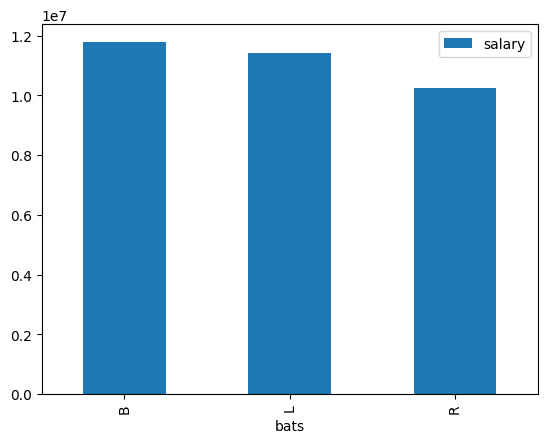

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [57]:
salariesPerPlayer = salaries.groupby('playerID').agg({'salary':'sum'}).reset_index()

players = players[['playerID', 'bats', 'throws']]

battingPerYear = battingTotals[['playerID', 'H', 'yearID']]

battingPerPlayer = battingPerYear.groupby('playerID').agg({'H':'sum'}).reset_index()

salariesAndHits = pd.merge(battingPerPlayer, salariesPerPlayer, on='playerID')

## Average salary per type of at bat player (L or R or B)
averageSalary = pd.merge(salariesPerPlayer, players, on='playerID')
averageSalaryPerBattingType = averageSalary.groupby('bats').agg({'salary':'mean'}).reset_index()
display(averageSalaryPerBattingType)
averageSalaryPerBattingType.plot.bar(x='bats', y='salary')
plt.figure()

#display(salariesAndHits)

## line plot for salaries and hits
##sns.lineplot(x='H', y='salary', data=salariesAndHits)


#sns.scatterplot(x='playerID', y='salary', data=totalPlayerSalaries)

## line plot for salaries and hits where hits are less than 500
lowerHits = salariesAndHits[salariesAndHits.H < 500]
plt.figure()
##sns.lineplot(x='H',y='salary', data=lowerHits)



In [58]:
pitching = pitching[pitching.yearID >= 1985]

pitchingPerPlayer = pitching.groupby('playerID').agg({'SO' : 'sum', 'W':'sum', 'GS':'sum'}).reset_index()

salariesAndPitches = pd.merge(pitchingPerPlayer, salariesPerPlayer, on='playerID')

# sns.lineplot(x='SO', y='salary', data=salariesAndPitches)
# plt.figure()
# sns.lineplot(x='W', y='SO', data=salariesAndPitches)
# plt.figure()
# sns.scatterplot(x='W', y='salary', data=salariesAndPitches)


## Definition of wins for a pitcher: Credited to the pitcher whose teams assumes a lead while such pitcher is in the game and does not relinquish such lead unless otherwise assigned by the official scorer.


# hitsAndStrikeoutsAndSalary = pd.merge(lowerHits, salariesAndPitches, on='playerID')
# plt.figure()
# sns.lineplot(x='H', y = 'SO', data=hitsAndStrikeoutsAndSalary)
# display(hitsAndStrikeoutsAndSalary)
# display(hitsAndStrikeoutsAndSalary[(hitsAndStrikeoutsAndSalary.SO > 3000) & (hitsAndStrikeoutsAndSalary.H > 250)])





In [59]:
## Fielding statistics

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
...,...,...,...
913,2016,SLN,143053500
914,2016,TBA,57097310
915,2016,TEX,176038723
916,2016,TOR,138701700


,yearID,teamID,W,L
1917,1985,ATL,66,96
1918,1985,BAL,83,78
1919,1985,BOS,81,81
1920,1985,CAL,90,72
1921,1985,CHA,85,77
...,...,...,...,...
2860,2017,SLN,83,79
2861,2017,TBA,80,82
2862,2017,TEX,78,84
2863,2017,TOR,76,86


,yearID,teamID,W,L,salary
0,1985,ATL,66,96,14807000
1,1985,BAL,83,78,11560712
2,1985,BOS,81,81,10897560
3,1985,CAL,90,72,14427894
4,1985,CHA,85,77,9846178
...,...,...,...,...,...
913,2016,SLN,86,76,143053500
914,2016,TBA,68,94,57097310
915,2016,TEX,95,67,176038723
916,2016,TOR,89,73,138701700


,yearID,teamID,W,L,salary
42,1986,NYN,108,54,15393714
350,1998,ATL,106,56,61186000
366,1998,NYA,114,48,66806867
462,2001,SEA,116,46,74720834
554,2004,SLN,105,57,83228333


<Axes: xlabel='W', ylabel='salary'>

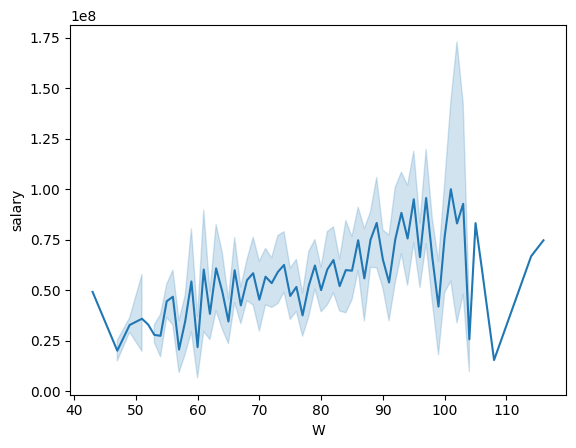

In [60]:
## Teams Salary and wins statistics


## Per year salaries and team wins
## All salaries added up per team per year
teams = teams[['yearID', 'teamID','W', 'L']]
salariesPerYearPerTeam = salaries.groupby(['yearID','teamID']).agg({'salary' : 'sum'}).reset_index()
display(salariesPerYearPerTeam)
display(teams)

## merge the teams and salaries per year per team datasets
salariesAndWins = pd.merge(teams, salariesPerYearPerTeam, on=['teamID', 'yearID'])

display(salariesAndWins)
display(salariesAndWins[salariesAndWins.W >= 105])
#salariesAndTeams = pd.merge(salaries, teams, on)

sns.lineplot(x='W',y='salary',data=salariesAndWins)

